In [ ]:
from pathlib import Path

while Path.cwd().name != 'language-model-toxicity':
    %cd ..

In [11]:
import pandas as pd
from hashlib import md5
import tldextract

from utils.constants import TEXTS_DIR, URLS_DIR, URLS_PICKLE

In [2]:
def get_domain(url):
    ext = tldextract.extract(url)
    if ext.domain == 'wordpress':
        return '.'.join(ext)
    else:
        return '.'.join(ext[1:])


def make_urls_df():
    rows = []
    for file in URLS_DIR.iterdir():
        urls = file.read_text().split()
        rows_from_file = [(url, md5(url.encode()).hexdigest()) for url in urls]
        rows.extend(rows_from_file)

    df = pd.DataFrame(rows, columns=['url', 'md5_hash'])
    df['domain'] = df['url'].apply(lambda url: get_domain(url))
    return df


def make_filenames_df():
    rows = [(file.name, file.name.split('-')[1].split('.')[0]) 
            for file in TEXTS_DIR.iterdir()]
    return pd.DataFrame(rows, columns=['filename', 'md5_hash'])

In [3]:
if URLS_PICKLE.exists():
    df = pd.read_pickle(URLS_PICKLE)
else:
    urls_df = make_urls_df()
    filenames_df = make_filenames_df()
    df = urls_df.merge(filenames_df)
    df.to_pickle(URLS_PICKLE)

In [12]:
df.head(20)

,url,filename,domain
0,http://www.guardian.co.uk/world/2010/may/31/pu...,0610905-8d5bdc4f88bed43e4f5f606a43bf4d61.txt,guardian.co.uk
1,http://links.org.au/node/1719,0147024-8b731d228ad09fcff1cc3ed6e06450bb.txt,links.org.au
2,http://www.tricycle.com/blog/?p=1782,0286995-93a6dcb796e6448bbeebd07b5379956d.txt,tricycle.com
3,http://www.sciencebasedmedicine.org/?p=5339,0155423-cb5aead54795dbfc57a56ccd1dab5830.txt,sciencebasedmedicine.org
4,http://www.itbusiness.ca/it/client/en/home/New...,0019075-4f9b2593bd76ccdd1aede0c220045cec.txt,itbusiness.ca


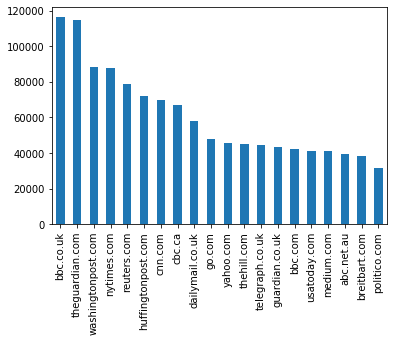

In [15]:
df['domain'].value_counts()[:20].plot(kind='bar')